## **19CSE456: Neural Network and Deep Learning : LAB3**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




1.   Select any classification dataset from UCI Machine Learning Library: https://archive.ics.uci.edu/ml/datasets.php
2.   Design a four layer neural network (4 hidden layers) and provide your testing accuracy on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
3. Design MLP of the same archetecure of question.2 and use different weight initialization strategies. Refer: https://keras.io/api/layers/initializers/ to know more about weight initialization. 
Try Different initialization schemes and find out which initialization works better on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
       * RandomNormal 
       * RandomUniform
       * TruncatedNormal
       * Zero
       * One
       * GlorotNormal
       * GlorotUniform 
       * HeNormal
       * HeUniform 
       * Identity
       * Orthogonal
4. Implement the MLP model with the best weight initialization from the previous experiment and use Relu as the activation funation and provide your testing accuracy on the selected dataset (**for 100 epochs**).
5. Use ADAM optimizer instead of SGD in question 4 and comapre the models in terms of test accuracy and train/validation (accuracy/loss) graphs.
6. Display confusion matrix for all of the bove experiments and write down your inferences.

**NOTE: This Experiment will be evaluated based on the submission (Code, Inferences and Analysis). Submit the Jupyter notebook and pdf version of the notebook**




In [5]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/adult.data")
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain',
'capital-loss','hours-per-week','native','income']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native            0
income            0
dtype: int64

In [7]:
import numpy as np
df = df.replace('?', np.nan)
df[pd.isnull(df).any(axis=1)].shape

(0, 15)

In [8]:
df.dropna(inplace=True)

In [9]:
df=pd.get_dummies(df,columns=["workclass",'education','marital-status','occupation','relationship','race','sex','native','income'])

In [10]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Holand-Netherlands,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,income_ <=50K,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32556,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32557,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32558,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
df.drop("education-num",axis=1,inplace=True)

In [12]:
normalize_columns =['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']

In [13]:
from sklearn import preprocessing
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df[columns] = scaler.fit_transform(df[columns])
normalize(normalize_columns)

In [15]:
X=df.iloc[:,:-2]
X

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Holand-Netherlands,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.837097,-1.008742,-0.145914,-0.216663,-2.222120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.042640,0.245046,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.057031,0.425770,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.775755,1.408146,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.115952,0.898170,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.639710,-0.145914,-0.216663,-0.197407,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,0.103982,-0.335466,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,1.423589,-0.358811,-0.145914,-0.216663,-0.035430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,-1.215624,0.110927,-0.145914,-0.216663,-1.655200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
y=df.iloc[:,-2:]
y

,income_ <=50K,income_ >50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32555,1,0
32556,0,1
32557,1,0
32558,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print(X_train.shape)
print(y_train.shape)

(26048, 107)
(26048, 2)


In [21]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [22]:
from tensorflow.keras.layers import Activation, Dense

In [23]:
model.add(Dense(10, input_shape = (107,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(2,activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1080      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,542
Trainable params: 1,542
Non-trainabl

In [25]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [27]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 3s 3ms/step - loss: 0.5835 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 2s 4ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [28]:
results = model.evaluate(X_test, y_test)

204/204 [==============================] - 1s 4ms/step - loss: 0.5404 - accuracy: 0.7693


In [29]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)   

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


In [31]:
for layer in model.layers:
  print(layer.get_config(),layer.get_weights())

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 107), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.16417673, -0.17809999,  0.17813174, ...,  0.1648494 ,
         0.20715742, -0.16902417],
       [-0.15318634, -0.20362064,  0.01751676, ..., -0.07978818,
        -0.04693888, -0.16910581],
       [-0.1752967 , -0.11485574, -0.03538522, ..., -0.05910772,
        -0.15635039, -0.01693279],
       ...,
       [ 0.03939779,  0.11284061, -0.0941684 , ..., -0.06429727,
        -0.14722584,  0.0306735 ],
       [ 0.11748334,  0.04799581,  0.00667045, ..., -0.14714183,
        -0.15909548, -0.04454119],
       [ 0.09557176, -0.21652895,  0.16878803, ...,  0.01732302,

In [33]:
ypred = model.predict(X_test)

In [36]:
model1=Sequential()

In [37]:
model1.add(Dense(10, input_shape = (107,),kernel_initializer='random_normal', activation = 'sigmoid'))
model1.add(Dense(10,kernel_initializer='random_normal', activation = 'sigmoid'))
model1.add(Dense(10,kernel_initializer='random_normal', activation = 'sigmoid'))
model1.add(Dense(10,kernel_initializer='random_normal', activation = 'sigmoid'))
model1.add(Dense(10,kernel_initializer='random_normal', activation = 'sigmoid'))
model1.add(Dense(2,kernel_initializer='random_normal',activation = 'softmax'))

In [38]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [39]:
history=model1.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 3s 3ms/step - loss: 0.5906 - accuracy: 0.7452
Epoch 2/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5558 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 2s 4ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 2s 5ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accura

In [62]:
li=[]
li1=[]

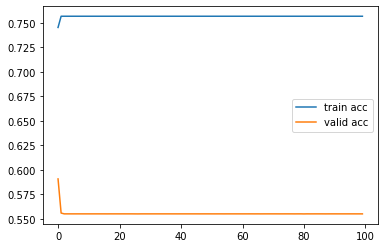

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['train acc','valid acc','train loss','valid loss'])
plt.show()

In [44]:
results1 = model1.evaluate(X_test, y_test)

204/204 [==============================] - 1s 4ms/step - loss: 0.5407 - accuracy: 0.7693


In [88]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)
li1.append(results[1])

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


In [89]:
li.append('random_normal')

###RANDOM UNIFORM

In [46]:
model2=Sequential()

In [47]:
model2.add(Dense(10, input_shape = (107,),kernel_initializer='random_uniform', activation = 'sigmoid'))
model2.add(Dense(10,kernel_initializer='random_uniform', activation = 'sigmoid'))
model2.add(Dense(10,kernel_initializer='random_uniform', activation = 'sigmoid'))
model2.add(Dense(10,kernel_initializer='random_uniform', activation = 'sigmoid'))
model2.add(Dense(10,kernel_initializer='random_uniform', activation = 'sigmoid'))
model2.add(Dense(2,kernel_initializer='random_uniform',activation = 'softmax'))

In [48]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [49]:
history2=model2.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5863 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accura

In [50]:
results2 = model2.evaluate(X_test, y_test)

204/204 [==============================] - 1s 3ms/step - loss: 0.5406 - accuracy: 0.7693


In [90]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  
li1.append(results[1])

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


In [91]:
li.append('random_uniform')

###TRUNCATED NORMAL

In [52]:
model3=Sequential()

In [53]:
model3.add(Dense(10, input_shape = (107,),kernel_initializer='truncated_normal', activation = 'sigmoid'))
model3.add(Dense(10,kernel_initializer='truncated_normal', activation = 'sigmoid'))
model3.add(Dense(10,kernel_initializer='truncated_normal', activation = 'sigmoid'))
model3.add(Dense(10,kernel_initializer='truncated_normal', activation = 'sigmoid'))
model3.add(Dense(10,kernel_initializer='truncated_normal', activation = 'sigmoid'))
model3.add(Dense(2,kernel_initializer='truncated_normal',activation = 'softmax'))

In [54]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [55]:
history3=model3.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 4s 4ms/step - loss: 0.5918 - accuracy: 0.7437
Epoch 2/100
521/521 [==============================] - 3s 5ms/step - loss: 0.5558 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 2s 4ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 2s 4ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accura

In [56]:
results3 = model3.evaluate(X_test, y_test)

204/204 [==============================] - 1s 3ms/step - loss: 0.5407 - accuracy: 0.7693


In [92]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  
li1.append(results[1])
li.append('truncated normal')

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


In [93]:
li

['random_normal', 'random_uniform', 'truncated normal']

In [81]:
def model_build(a):
  model4=Sequential()
  model4.add(Dense(10, input_shape = (107,),kernel_initializer=a, activation = 'sigmoid'))
  model4.add(Dense(10,kernel_initializer=a, activation = 'sigmoid'))
  model4.add(Dense(10,kernel_initializer=a, activation = 'sigmoid'))
  model4.add(Dense(10,kernel_initializer=a, activation = 'sigmoid'))
  model4.add(Dense(10,kernel_initializer=a, activation = 'sigmoid'))
  model4.add(Dense(2,kernel_initializer=a,activation = 'softmax'))
  return model4

In [84]:
model5=model_build('zeros')

In [85]:
history3=model3.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accura

In [94]:
li.append('zeros')

In [96]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model5.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [97]:
results4 = model5.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.7693


In [98]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  
li1.append(results[1])

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


####ONE

In [99]:
model6=model_build('ones')

In [101]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model6.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [102]:
model6.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Epoch 1/100
521/521 [==============================] - 2s 3ms/step - loss: 1.8696 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5772 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [103]:
results5 = model6.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7693


In [104]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  
li1.append(results[1])
li.append('ones')

['loss', 'accuracy']
[0.540416419506073, 0.7693489193916321]


####GLOROT NORMAL

In [105]:
model7=model_build('glorot_normal')

In [107]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model7.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [108]:
history6=model7.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5801 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [109]:
results6 = model7.evaluate(X_test, y_test)

204/204 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7693


In [110]:
print(model7.metrics_names)     # list of metric names the model is employing
print(results6)  
li1.append(results6[1])
li.append('Glorot_normal')

['loss', 'accuracy']
[0.5403618216514587, 0.7693489193916321]


####GLOROT UNIFORM

In [112]:
model8=model_build('glorot_uniform')

In [113]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model8.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [114]:
history7=model8.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 3s 3ms/step - loss: 0.6058 - accuracy: 0.7400
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5553 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 2s 5ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5550 - accura

In [115]:
results7 = model8.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7693


In [116]:
print(model8.metrics_names)     # list of metric names the model is employing
print(results7)  
li1.append(results7[1])
li.append('Glorot_uniform')

['loss', 'accuracy']
[0.5405368208885193, 0.7693489193916321]


###HE NORMAL

In [117]:
model9=model_build('he_normal')

In [118]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model9.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [119]:
history8=model9.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 3s 3ms/step - loss: 0.5752 - accuracy: 0.7566
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 2s 5ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 3ms/step - loss: 0.5548 - accura

In [120]:
results8 = model9.evaluate(X_test, y_test)

204/204 [==============================] - 1s 3ms/step - loss: 0.5396 - accuracy: 0.7693


In [121]:
print(model9.metrics_names)     # list of metric names the model is employing
print(results8)  
li1.append(results8[1])
li.append('He_Normal')

['loss', 'accuracy']
[0.5396482348442078, 0.7693489193916321]


###HE UNIFORM

In [122]:
model10=model_build('he_uniform')

In [123]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model10.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [124]:
history9=model10.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 2s 2ms/step - loss: 0.5867 - accuracy: 0.7268
Epoch 2/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [126]:
results9 = model10.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7693


In [127]:
print(model10.metrics_names)     # list of metric names the model is employing
print(results9)  
li1.append(results9[1])
li.append('He_Uniform')

['loss', 'accuracy']
[0.5399184823036194, 0.7693489193916321]


###IDENTITY

In [125]:
model11=model_build('identity')

In [128]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model11.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [129]:
history10=model11.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5839 - accuracy: 0.7558
Epoch 2/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [130]:
results10 = model11.evaluate(X_test, y_test)

204/204 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7693


In [131]:
print(model11.metrics_names)     # list of metric names the model is employing
print(results10)  
li1.append(results10[1])
li.append('Identity')

['loss', 'accuracy']
[0.5405286550521851, 0.7693489193916321]


###ORTHOGONAL

In [132]:
model12=model_build('orthogonal')


In [133]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model12.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [134]:
history11=model12.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5971 - accuracy: 0.7318
Epoch 2/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7566
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7566
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7566
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.5550 - accura

In [135]:
results11 = model12.evaluate(X_test, y_test)

204/204 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7693


In [136]:
print(model11.metrics_names)     # list of metric names the model is employing
print(results10)  
li1.append(results10[1])
li.append('orthogonal')

['loss', 'accuracy']
[0.5405286550521851, 0.7693489193916321]


In [137]:
li

['random_normal',
 'random_uniform',
 'truncated normal',
 'zeros',
 'ones',
 'Glorot_normal',
 'Glorot_uniform',
 'He_Normal',
 'He_Uniform',
 'Identity',
 'orthogonal']

In [138]:
li1

[0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321,
 0.7693489193916321]

Text(0, 0.5, 'Accuracy')

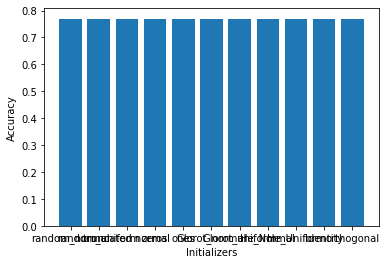

In [139]:
plt.bar(li,li1)
plt.xlabel("Initializers")
plt.ylabel("Accuracy")

####QUESTION 4

In [140]:
model13=Sequential()

In [141]:

model13.add(Dense(10, input_shape = (107,),kernel_initializer='he_normal', activation = 'relu'))
model13.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model13.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model13.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model13.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model13.add(Dense(2,kernel_initializer='he_normal',activation = 'relu'))

In [142]:
from tensorflow.keras import optimizers
import tensorflow as tf
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model13.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [143]:
history12=model13.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 4s 4ms/step - loss: 0.7356 - accuracy: 0.7607
Epoch 2/100
521/521 [==============================] - 2s 4ms/step - loss: 0.6945 - accuracy: 0.7922
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 10.9581 - accuracy: 0.2434
Epoch 4/100
521/521 [==============================] - 1s 3ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 5/100
521/521 [==============================] - 1s 3ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 6/100
521/521 [==============================] - 1s 3ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 7/100
521/521 [==============================] - 1s 3ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 9/100
521/521 [==============================] - 1s 3ms/step - loss: 11.6047 - accuracy: 0.2434
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 11.6047 

In [144]:
results12 = model13.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 11.7996 - accuracy: 0.2307


In [145]:
print(model13.metrics_names)     # list of metric names the model is employing
print(results12)  

['loss', 'accuracy']
[11.799576759338379, 0.2306511104106903]


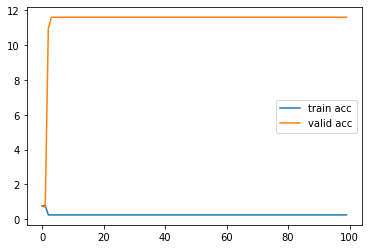

In [146]:
import matplotlib.pyplot as plt
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['loss'])
plt.legend(['train acc','valid acc','train loss','valid loss'])
plt.show()

###QUESTION 5

In [148]:
model14=Sequential()

In [149]:
model14.add(Dense(10, input_shape = (107,),kernel_initializer='he_normal', activation = 'relu'))
model14.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model14.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model14.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model14.add(Dense(10,kernel_initializer='he_normal', activation = 'relu'))
model14.add(Dense(2,kernel_initializer='he_normal',activation = 'relu'))

In [151]:
from tensorflow.keras import optimizers
from tensorflow import keras
import tensorflow as tf
opt = keras.optimizers.Adam(learning_rate=0.01)
model14.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [152]:
history13=model14.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
521/521 [==============================] - 3s 4ms/step - loss: 0.3610 - accuracy: 0.8373
Epoch 2/100
521/521 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8483
Epoch 3/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3397 - accuracy: 0.8473
Epoch 4/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3408 - accuracy: 0.8486
Epoch 5/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3607 - accuracy: 0.8558
Epoch 6/100
521/521 [==============================] - 3s 6ms/step - loss: 0.3279 - accuracy: 0.8566
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8573
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8491
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8580
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.3079 - accura

In [153]:
results13 = model14.evaluate(X_test, y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8584


In [154]:
print(model13.metrics_names)     # list of metric names the model is employing
print(results12)  

['loss', 'accuracy']
[11.799576759338379, 0.2306511104106903]
